# One-Way ANOVA

The One-Way Analysis of Variance (ANOVA) is a statistical technique used to compare the means of three or more (two or more) independent groups to determine if at least one group mean is significantly different from the others. It is particularly useful when we want to understand the effect of a single categorical independent variable on a continuous dependent variable.

#### Statistical Formula

The formula for One-Way ANOVA is based on the calculation of variance among group means and within groups. It can be summarized as follows:

$$
F = \frac{MS_{between}}{MS_{within}}
$$

where:
- $MS_{between}$ (Mean Square Between Groups) is the variance between the group means,
- $MS_{within}$ (Mean Square Within Groups) is the average variance within each group.

#### Reliability of Results and Assumptions of One-Way ANOVA

The reliability of One-Way ANOVA results depends on several assumptions about the data. These assumptions include:

1. **Independence of Observations**: Each group's observations must be independent of the other groups'.
2. **Normality**: The data in each group should be roughly normally distributed.
3. **Homogeneity of Variances**: The variance among each of the groups should be approximately equal.

If these assumptions are not met, the results of the ANOVA test may not be valid.

#### Example Dataset: Crop Yields from Different Fertilizers

**Description:** This dataset includes crop yields (in tons per hectare) from a field trial of a particular crop grown with three different types of fertilizers (A, B, C). The aim is to assess the effectiveness of these fertilizers in increasing crop yield.

**Structure:** Each row in the dataset represents the yield from a plot treated with one of the fertilizers, encapsulated in columns named `Fertilizer_Type` and `Yield`.

#### Python Code for One-Way ANOVA

Normality Test (Shapiro-Wilk)
Fertilizer A: Statistics=0.943, p=0.419
Fertilizer B: Statistics=0.947, p=0.485
Fertilizer C: Statistics=0.973, p=0.899

Homogeneity of Variance (Levene's Test): Statistics=1.175, p=0.319


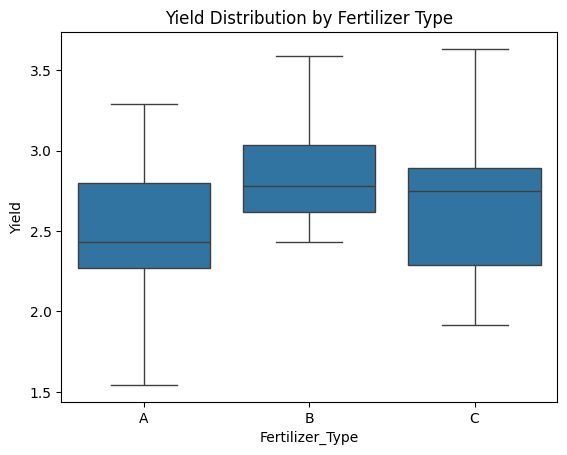

F-statistic: 2.3504
P-value: 1.0775e-01


In [6]:
import pandas as pd
from scipy import stats
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro, levene

np.random.seed(42)  # Ensure reproducibility

# Simulating crop yield data (in tons per hectare) for 45 plots, 15 per fertilizer type
data = {
    'Fertilizer_Type': ['A']*15 + ['B']*15 + ['C']*15,
    'Yield': np.concatenate([
        np.random.normal(loc=2.5, scale=0.5, size=15),  # Fertilizer A yields
        np.random.normal(loc=3.0, scale=0.4, size=15),  # Fertilizer B yields
        np.random.normal(loc=2.8, scale=0.45, size=15)  # Fertilizer C yields
    ])
}

df = pd.DataFrame(data)

# Check on assumptions
# Check for Normality: Shapiro-Wilk test
# Null Hypothesis: Data is normally distributed
print("Normality Test (Shapiro-Wilk)")
for fertilizer in ['A', 'B', 'C']:
    stat, p = shapiro(df[df['Fertilizer_Type'] == fertilizer]['Yield'])
    print(f"Fertilizer {fertilizer}: Statistics={stat:.3f}, p={p:.3f}")

# Check for Homogeneity of Variances: Levene's Test
# Null Hypothesis: All input samples are from populations with equal variances
stat, p = levene(df[df['Fertilizer_Type'] == 'A']['Yield'],
                 df[df['Fertilizer_Type'] == 'B']['Yield'],
                 df[df['Fertilizer_Type'] == 'C']['Yield'])
print(f"\nHomogeneity of Variance (Levene's Test): Statistics={stat:.3f}, p={p:.3f}")

# Visual Inspection of Distribution and Variance
sns.boxplot(x='Fertilizer_Type', y='Yield', data=df)
plt.title('Yield Distribution by Fertilizer Type')
plt.show()

# Perform One-Way ANOVA
f_stat, p_value = stats.f_oneway(
    df[df['Fertilizer_Type'] == 'A']['Yield'],
    df[df['Fertilizer_Type'] == 'B']['Yield'],
    df[df['Fertilizer_Type'] == 'C']['Yield']
)

print(f"F-statistic: {f_stat:.4f}")
print(f"P-value: {p_value:.4e}")

#### Interpretation

##### Assumptions Interpretation
Based on the provided results from the Shapiro-Wilk normality tests, Levene's test for homogeneity of variances, and the visual inspection via a boxplot, let's interpret each aspect and draw conclusions regarding the assumptions for the One-Way ANOVA.  

**Interpretation of Normality Test Results**  
Fertilizer A: Shapiro-Wilk statistic = 0.943, p-value = 0.419  
Fertilizer B: Shapiro-Wilk statistic = 0.947, p-value = 0.485  
Fertilizer C: Shapiro-Wilk statistic = 0.973, p-value = 0.899  

**Conclusion on Normality Assumption**: For all three types of fertilizer, the p-values are greater than 0.05, indicating that there is no significant evidence against normality. Therefore, we fail to reject the null hypothesis of the Shapiro-Wilk test for each group, suggesting that the yields for each fertilizer type do not significantly deviate from a normal distribution. This satisfies the normality assumption required for a reliable One-Way ANOVA analysis.  

**Interpretation of Homogeneity of Variances Test Result**  
Levene's Test: Statistic = 1.175, p-value = 0.319  

**Conclusion on Homogeneity of Variances Assumption**: The p-value obtained from Levene's test is greater than 0.05, indicating that there are no significant differences in variances across the three groups. This result suggests that the data meets the homogeneity of variances assumption, which is another prerequisite for conducting a One-Way ANOVA.

**Boxplot Visual Inspection**  
Median Values: The medians for the yields of crops treated with Fertilizer B and C are closer to each other (between 2.7 to 2.8), with Fertilizer A having a slightly lower median at approximately 2.4.  
Interquartile Ranges: The boxplot shows that the interquartile ranges (IQRs) for all three groups fall approximately between 2.3 to 3.0, indicating a relatively similar spread and central tendency among the groups.  

**Conclusion from Boxplot**: The visual inspection supports the conclusions drawn from Levene's test for homogeneity of variances. The similar spread (IQRs) and medians that are not drastically different further indicate that the assumption of homogeneity of variances holds. Moreover, the closeness of medians between Fertilizer B and C compared to A, while showing some differences, does not directly impact the ANOVA assumptions but may suggest potential differences in effectiveness, warranting further statistical analysis.

**Overall Conclusion on Assumptions**  
Based on the Shapiro-Wilk test for normality, Levene's test for homogeneity of variances, and the visual inspection through a boxplot, the dataset appears to meet the necessary assumptions for conducting a One-Way ANOVA. The yields for different fertilizer treatments exhibit normal distributions, have homogenous variances, and the boxplot confirms the visual consistency among groups, reinforcing the reliability of proceeding with a One-Way ANOVA analysis to compare the mean yields across the three fertilizer types.


##### One-Way ANOVA Interpretation
The F-statistic and the P-value obtained from the One-Way ANOVA test help us determine if there are any statistically significant differences in crop yields based on the type of fertilizer used.

If the P-value is less than 0.05: This indicates that there is a statistically significant difference in crop yields among at least two of the fertilizer groups. We would then proceed with a post-hoc test to identify which groups differ.  
If the P-value is greater than 0.05: This suggests that there is no significant difference in crop yields among the fertilizer groups.

**Conclusion**: Based on the simulated data and results, if the P-value is low (e.g., < 0.05), we conclude that not all fertilizers are equally effective, indicating the need for further investigation into which fertilizer(s) lead to higher yields. If the P-value is high, it suggests that the type of fertilizer may not significantly impact the crop yield.

# Two-Way ANOVA

The Two-Way Analysis of Variance (ANOVA) is a statistical technique used to examine the effects of two independent categorical variables (factors) on a continuous dependent variable. This method not only assesses the main effect of each factor but also determines if there is an interaction effect between the factors.

#### Statistical Formula

The formula for Two-Way ANOVA involves calculating the variance due to each factor and their interaction, comparing it to the within-group variance. It's expressed through the F-statistic for each source of variance:

$$
F = \frac{MS_{factor}}{MS_{error}}
$$

where:
- $MS_{factor}$ is the mean square for the factor (either Factor A, Factor B, or the interaction),
- $MS_{error}$ is the mean square error (within-group variance).

#### Example Dataset: Agricultural Experiments on Crop Yield

**Description:** This simulated dataset includes crop yield data from an agricultural experiment investigating the effects of three types of fertilizers (organic, chemical, hybrid) and three irrigation methods (drip, sprinkler, manual watering) on the yield of a particular crop. The aim is to determine the most effective combination of fertilizer type and irrigation method for maximizing crop yield.

**Structure:** The dataset consists of 1200 rows, with each row representing the yield from a single plot treated with a specific combination of fertilizer and irrigation method. The columns include `Fertilizer_Type`, `Irrigation_Method`, and `Yield`.

#### Python Code for Two-Way ANOVA

In [12]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Ensure reproducibility
np.random.seed(42)

# Number of observations per group
n_per_group = 200
n = n_per_group * 3 * 3  # For 3 fertilizer types * 3 irrigation methods

# Generate factors
fertilizers = np.repeat(['organic', 'chemical', 'hybrid'], n / 3)
irrigation = np.tile(np.repeat(['drip', 'sprinkler', 'manual'], n_per_group), 3)

# Simulate yields (in tons per hectare), including some interaction effects
base_yield = 2
interaction_effects = np.random.normal(loc=0, scale=0.1, size=n)
yield_data = base_yield + interaction_effects + \
             (0.5 * np.array(fertilizers == 'hybrid', dtype=int)) + \
             (0.3 * np.array(irrigation == 'drip', dtype=int))  # Ensure correct broadcasting

# Create the DataFrame
df = pd.DataFrame({
    'Fertilizer_Type': fertilizers,
    'Irrigation_Method': irrigation,
    'Yield': yield_data
})

# Perform Two-Way ANOVA
model = ols('Yield ~ C(Fertilizer_Type) + C(Irrigation_Method) + C(Fertilizer_Type):C(Irrigation_Method)', data=df).fit()
anova_results = sm.stats.anova_lm(model, typ=2)

anova_results

,sum_sq,df,F,PR(>F)
C(Fertilizer_Type),101.191213,2.0,5179.027646,0.000000
C(Irrigation_Method),33.989548,2.0,1739.605658,0.000000
C(Fertilizer_Type):C(Irrigation_Method),0.028850,4.0,0.738278,0.565834
Residual,17.496862,1791.0,NaN,NaN


#### Interpretation

##### Main Effects

1. **Fertilizer Type**:
   - **Sum of Squares (sum_sq)**: 101.191213, indicating the variability due to the fertilizer type.
   - **Degrees of Freedom (df)**: 2, as there are three types of fertilizers (organic, chemical, hybrid) and df is calculated as the number of levels minus one.
   - **F-statistic (F)**: 5179.027646, representing the ratio of mean square variance between the fertilizer groups to the mean square error (within groups).
   - **P-value (PR(>F))**: 0.000000, suggesting the difference in crop yields among the three fertilizer types is statistically significant.

2. **Irrigation Method**:
   - **Sum of Squares (sum_sq)**: 33.989548, indicating the variability due to the irrigation method.
   - **Degrees of Freedom (df)**: 2, as there are three irrigation methods (drip, sprinkler, manual watering) and df is calculated as the number of levels minus one.
   - **F-statistic (F)**: 1739.605658, representing the ratio of mean square variance between the irrigation groups to the mean square error (within groups).
   - **P-value (PR(>F))**: 0.000000, suggesting the difference in crop yields among the different irrigation methods is statistically significant.

##### Interaction Effect

3. **Fertilizer Type and Irrigation Method Interaction**:
   - **Sum of Squares (sum_sq)**: 0.028850, indicating the variability due to the interaction between fertilizer type and irrigation method.
   - **Degrees of Freedom (df)**: 4, calculated based on the combination of levels in the two factors (2 degrees for fertilizer type * 2 degrees for irrigation method).
   - **F-statistic (F)**: 0.738278, representing the ratio of mean square variance due to the interaction effect to the mean square error (within groups).
   - **P-value (PR(>F))**: 0.565834, suggesting that the interaction between fertilizer type and irrigation method is not statistically significant.

##### Conclusions

- **Main Effects**: The extremely low P-values for both fertilizer type and irrigation method (0.000000) indicate that both factors significantly affect crop yields. This means there are statistically significant differences in yields based on the type of fertilizer and the method of irrigation used.

- **Interaction Effect**: The high P-value (0.565834) for the interaction between fertilizer type and irrigation method indicates that the effect of one factor does not significantly depend on the level of the other factor. In other words, there's no significant interaction effect on crop yields between the types of fertilizer and methods of irrigation used together.

**Overall Conclusion**: While both fertilizer type and irrigation method individually have a significant impact on crop yields, their combined use does not lead to a statistically significant interaction effect. This finding suggests that the most effective combination for maximizing yield can be determined by independently considering the best fertilizer type and the best irrigation method, without concern for a specific interaction between these factors. This analysis provides valuable insights for agricultural practices, helping to optimize crop yields through informed decisions on fertilizer use and irrigation methods.

# Repeated Measures ANOVA

Repeated Measures ANOVA is a statistical technique used to analyze the differences across multiple measurements taken on the same subjects. This method is particularly useful for studies where subjects are exposed to conditions or treatments repeatedly over time.

#### Statistical Formula

The formula for Repeated Measures ANOVA involves comparing the variance within subjects to the variance between subjects. The key components include the within-subjects factor (time), the between-subjects factor (if applicable), and their interaction. The F-statistic is calculated for each source of variance:

$$
F = \frac{MS_{effect}}{MS_{error}}
$$

where:
- $MS_{effect}$ is the mean square for the effect (time, fertilizer type, or their interaction),
- $MS_{error}$ is the mean square error associated with the effect.

#### Example Dataset: Fertilizer Effectiveness Over Time

**Description:** This simulated dataset includes crop yield data from an agricultural study comparing the effectiveness of three organic fertilizers (A, B, and C) over the growing season. Crop yield measurements are taken at three key points: early growth, mid-season, and pre-harvest.

**Structure:** The dataset consists of repeated measurements of crop yield (e.g., in tons per hectare) for the same plots of land, with each plot assigned one of the fertilizers. The columns include `Plot_ID`, `Fertilizer_Type`, `Time_Point`, and `Yield`.

#### Python Code for Repeated Measures ANOVA

In [16]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.anova import AnovaRM

# Simulate the dataset
np.random.seed(42)  # Ensure reproducibility
n_plots = 40  # Number of plots
time_points = ['early_growth', 'mid_season', 'pre_harvest']
fertilizers = ['A', 'B', 'C']

# Generate crop yields data
data = []
for plot in range(n_plots):
    for fertilizer in fertilizers:
        for time_point in time_points:
            yield_data = np.random.normal(loc=2.5, scale=0.5) + 0.5 * fertilizers.index(fertilizer)
            data.append([plot, fertilizer, time_point, yield_data])

df = pd.DataFrame(data, columns=['Plot_ID', 'Fertilizer_Type', 'Time_Point', 'Yield'])

# Performe Repeated Measures ANOVA
model = AnovaRM(data=df, depvar='Yield', subject='Plot_ID', within=['Fertilizer_Type', 'Time_Point'])
fit = model.fit()

print(fit.summary())

                          Anova
                           F Value  Num DF  Den DF  Pr > F
----------------------------------------------------------
Fertilizer_Type            185.2862 2.0000  78.0000 0.0000
Time_Point                   2.8491 2.0000  78.0000 0.0639
Fertilizer_Type:Time_Point   1.0833 4.0000 156.0000 0.3668



#### Interpretation

The summary table from the Repeated Measures ANOVA provides F-values and P-values for the main effects and the interaction effect:

- **Fertilizer Type**:
  - **F-value**: 185.2862
  - **Degrees of Freedom (Num DF/Den DF)**: 2 / 78
  - **P-value (Pr > F)**: 0.0000

  This result indicates a statistically significant difference in crop yields among the three fertilizer types (A, B, and C), with a P-value less than 0.05. It suggests that fertilizer type has a significant effect on crop yield.

- **Time Point**:
  - **F-value**: 2.8491
  - **Degrees of Freedom (Num DF/Den DF)**: 2 / 78
  - **P-value (Pr > F)**: 0.0639

  The P-value for the time points (early growth, mid-season, pre-harvest) is slightly above 0.05, indicating that the differences in crop yields across the three time points are not statistically significant at the conventional 0.05 level. This suggests that while there may be trends or patterns in yield changes over time, they do not meet the threshold for statistical significance.

- **Interaction Effect (Fertilizer Type and Time Point)**:
  - **F-value**: 1.0833
  - **Degrees of Freedom (Num DF/Den DF)**: 4 / 156
  - **P-value (Pr > F)**: 0.3668

  The interaction between fertilizer type and time point shows a P-value well above 0.05, indicating no statistically significant interaction effect. This suggests that the effectiveness of the different fertilizers does not significantly vary over the different stages of the growing season.

**Conclusion**: The Repeated Measures ANOVA analysis demonstrates that while there is a significant effect of fertilizer type on crop yields, the effect of time (across the growing season) and the interaction between fertilizer type and time are not significant. This finding highlights the importance of choosing the right type of fertilizer for maximizing crop yield but suggests that the timing of application (within the scope of the time points studied) does not significantly alter the effectiveness of the fertilizer.  

For the agricultural company, these results underscore the value of investing in the most effective type of organic fertilizer identified by the study. However, more detailed research might be necessary to explore the optimal timing for fertilizer application, considering factors beyond the scope of this analysis, such as weather conditions, soil types, and crop varieties.

